In [4]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
train = pd.read_csv('../MachineHackODIMatchWinner/Train.csv')
test = pd.read_csv('../MachineHackODIMatchWinner/Test.csv')

In [44]:
train.columns

Index(['Team1', 'Team2', 'Stadium', 'HostCountry', 'Team1_Venue',
       'Team2_Venue', 'Team1_Innings', 'Team2_Innings', 'MonthOfMatch',
       'MatchWinner'],
      dtype='object')

In [11]:
train.describe()

,Team1,Team2,Stadium,HostCountry,MatchWinner
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,7.274322,9.179426,73.502791,7.572568,7.991627
std,4.635982,4.574049,43.936337,5.594166,4.694191
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,36.000000,3.000000,4.000000
50%,6.500000,10.000000,71.000000,9.000000,9.000000
75%,12.000000,13.000000,111.000000,13.000000,12.000000
max,15.000000,15.000000,151.000000,16.000000,15.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 10 columns):
Team1            2508 non-null int64
Team2            2508 non-null int64
Stadium          2508 non-null int64
HostCountry      2508 non-null int64
Team1_Venue      2508 non-null object
Team2_Venue      2508 non-null object
Team1_Innings    2508 non-null object
Team2_Innings    2508 non-null object
MonthOfMatch     2508 non-null object
MatchWinner      2508 non-null int64
dtypes: int64(5), object(5)
memory usage: 196.1+ KB


In [6]:
train.MatchWinner.value_counts()

1     379
5     318
10    316
14    262
13    246
12    245
4     237
9     223
15     87
2      70
6      33
0      27
7      24
11     18
8      15
3       8
Name: MatchWinner, dtype: int64

In [9]:
                    train.Stadium.value_counts()

130    158
36     129
138    108
95     105
43     103
      ... 
113      1
127      1
145      1
147      1
150      1
Name: Stadium, Length: 147, dtype: int64

In [10]:
train.HostCountry.value_counts()

0     407
4     275
3     267
9     220
12    218
15    196
14    189
13    180
16    135
1     132
10    128
6      50
5      37
8      25
2      23
11     21
7       5
Name: HostCountry, dtype: int64

In [22]:
train.Team1_Venue.unique() 
train.Team2_Venue.unique()
test.Team1_Venue.unique() #fix this
test.Team2_Venue.unique()

array(['Away', 'Neutral'], dtype=object)

In [23]:
test

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch
0,2,4,34,1,Home,Away,First,Second,Oct
1,14,1,19,15,Home,Away,First,Second,Mar
2,9,10,130,14,Neutral,Neutral,Second,First,Dec
3,9,10,8,9,Home,Away,First,Second,Dec
4,5,15,130,14,Neutral,Neutral,First,Second,Oct
...,...,...,...,...,...,...,...,...,...
1070,15,5,64,16,Home,Away,First,Second,Jun
1071,1,12,95,0,Home,Away,First,Second,Feb
1072,5,10,43,1,Neutral,Neutral,First,Second,Mar
1073,10,13,111,0,Neutral,Neutral,Second,First,Mar


In [32]:
train.groupby(['MonthOfMatch', 'Team2_Innings']).count()

Team1  Team2  Stadium  HostCountry  Team1_Venue  \
MonthOfMatch Team2_Innings                                                    
Apr          First             92     92       92           92           92   
             Second           105    105      105          105          105   
Aug          First             65     65       65           65           65   
             Second            68     68       68           68           68   
Dec          First            101    101      101          101          101   
             Second           107    107      107          107          107   
Feb          First            140    140      140          140          140   
             Second           167    167      167          167          167   
Jan          First            192    192      192          192          192   
             Second           188    188      188          188          188   
Jul          First             82     82       82           82           82   
             Second            61     61       61           61           61   
Jun          First             97     97       97           97           97   
             Second            79     79       79           79           79   
Mar          First            141    141      141          141          141   
             Second           139    139      139          139          139   
May          First             71     71       71           71           71   
             Second            51     51       51           51           51   
Nov          First             89     89       89           89           89   
             Second            87     87       87           87           87   
Oct          First            114    114      114          114          114   
             Second           125    125      125          125          125   
Sep          First             71     71       71           71           71   
             Second            76     76       76           76           76   

                            Team2_Venue  Team1_Innings  MatchWinner  
MonthOfMatch Team2_Innings                                           
Apr          First                   92             92           92  
             Second                 105            105          105  
Aug          First                   65             65           65  
             Second                  68             68           68  
Dec          First                  101            101          101  
             Second                 107            107          107  
Feb          First                  140            140          140  
             Second                 167            167          167  
Jan          First                  192            192          192  
             Second                 188            188          188  
Jul          First                   82             82           82  
             Second                  61             61           61  
Jun          First                   97             97           97  
             Second                  79             79           79  
Mar          First                  141            141          141  
             Second                 139            139          139  
May          First                   71             71           71  
             Second                  51             51           51  
Nov          First                   89             89           89  
             Second                  87             87           87  
Oct          First                  114            114          114  
             Second                 125            125          125  
Sep          First                   71             71           71  
             Second                  76             76           76

In [37]:
train.Team1_Venue.value_counts()

Home       1797
Neutral     710
Away          1
Name: Team1_Venue, dtype: int64

In [40]:
train.groupby(['Team1_Venue','Team1']).count()

Team2  Stadium  HostCountry  Team2_Venue  Team1_Innings  \
Team1_Venue Team1                                                            
Away        10         1        1            1            1              1   
Home        1        286      286          286          286            286   
            2        104      104          104          104            104   
            3         10       10           10           10             10   
            4        190      190          190          190            190   
            5        205      205          205          205            205   
            6         33       33           33           33             33   
            7         30       30           30           30             30   
            8         12       12           12           12             12   
            9        196      196          196          196            196   
            10       114      114          114          114            114   
            11        20       20           20           20             20   
            12       164      164          164          164            164   
            13       146      146          146          146            146   
            14       160      160          160          160            160   
            15       127      127          127          127            127   
Neutral     0         26       26           26           26             26   
            1        100      100          100          100            100   
            2         34       34           34           34             34   
            3         22       22           22           22             22   
            4         69       69           69           69             69   
            5        159      159          159          159            159   
            6         16       16           16           16             16   
            7         20       20           20           20             20   
            8          8        8            8            8              8   
            9         57       57           57           57             57   
            10       135      135          135          135            135   
            11         2        2            2            2              2   
            12        21       21           21           21             21   
            13        30       30           30           30             30   
            14        11       11           11           11             11   

                   Team2_Innings  MonthOfMatch  MatchWinner  
Team1_Venue Team1                                            
Away        10                 1             1            1  
Home        1                286           286          286  
            2                104           104          104  
            3                 10            10           10  
            4                190           190          190  
            5                205           205          205  
            6                 33            33           33  
            7                 30            30           30  
            8                 12            12           12  
            9                196           196          196  
            10               114           114          114  
            11                20            20           20  
            12               164           164          164  
            13               146           146          146  
            14               160           160          160  
            15               127           127          127  
Neutral     0                 26            26           26  
            1                100           100          100  
            2                 34            34           34  
            3                 22            22           22  
            4                 69            69           69  
            5     

In [38]:
train.groupby(['Team1_Venue', 'Team2']).count()

Team1  Stadium  HostCountry  Team2_Venue  Team1_Innings  \
Team1_Venue Team2                                                            
Away        5          1        1            1            1              1   
Home        0         30       30           30           30             30   
            1        202      202          202          202            202   
            2         81       81           81           81             81   
            3         12       12           12           12             12   
            4        185      185          185          185            185   
            5        209      209          209          209            209   
            6         16       16           16           16             16   
            7         30       30           30           30             30   
            8         13       13           13           13             13   
            9        169      169          169          169            169   
            10       200      200          200          200            200   
            11        11       11           11           11             11   
            12       132      132          132          132            132   
            13       197      197          197          197            197   
            14       205      205          205          205            205   
            15       105      105          105          105            105   
Neutral     1          2        2            2            2              2   
            2          6        6            6            6              6   
            3          5        5            5            5              5   
            4          8        8            8            8              8   
            5         28       28           28           28             28   
            6         11       11           11           11             11   
            7         18       18           18           18             18   
            8         12       12           12           12             12   
            9         54       54           54           54             54   
            10       116      116          116          116            116   
            11        19       19           19           19             19   
            12        67       67           67           67             67   
            13       144      144          144          144            144   
            14       130      130          130          130            130   
            15        90       90           90           90             90   

                   Team2_Innings  MonthOfMatch  MatchWinner  
Team1_Venue Team2                                            
Away        5                  1             1            1  
Home        0                 30            30           30  
            1                202           202          202  
            2                 81            81           81  
            3                 12            12           12  
            4                185           185          185  
            5                209           209          209  
            6                 16            16           16  
            7                 30            30           30  
            8                 13            13           13  
            9                169           169          169  
            10               200           200          200  
            11                11            11           11  
            12               132           132          132  
            13               197           197          197  
            14               205           205          205  
            15               105           105          105  
Neutral     1                  2             2            2  
            2                  6             6            6  
            3                  5             5            5  
  

In [41]:
from pycaret.classification import *

In [80]:
exp_clf102 = setup(data = train, target = 'MatchWinner', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                 feature_interaction=True,
                   categorical_features=['Team1', 'Team2', 'Stadium', 'HostCountry', 'Team1_Venue',
       'Team2_Venue', 'Team1_Innings', 'Team2_Innings', 'MonthOfMatch']
                  )
 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(2508, 10)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [82]:
exp_clf102

(      Team1_0  Team1_1  Team1_10  Team1_11  Team1_12  Team1_13  Team1_14  \
 0         0.0      0.0       0.0       0.0       0.0       0.0       0.0   
 1         0.0      1.0       0.0       0.0       0.0       0.0       0.0   
 2         0.0      0.0       0.0       0.0       0.0       0.0       0.0   
 3         0.0      0.0       0.0       0.0       0.0       0.0       0.0   
 4         0.0      0.0       0.0       0.0       0.0       0.0       0.0   
 ...       ...      ...       ...       ...       ...       ...       ...   
 2503      0.0      0.0       0.0       0.0       0.0       0.0       0.0   
 2504      0.0      1.0       0.0       0.0       0.0       0.0       0.0   
 2505      0.0      0.0       0.0       0.0       0.0       0.0       1.0   
 2506      0.0      0.0       0.0       0.0       0.0       0.0       0.0   
 2507      0.0      1.0       0.0       0.0       0.0       0.0       0.0   
 
       Team1_15  Team1_2  Team1_3  ...  Team1_Venue_Neutral_multiply_Team1

In [81]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.6421,0,0.5803,0.6513,0.6357,0.5998
1,Logistic Regression,0.6319,0,0.5894,0.638,0.6249,0.5881
2,CatBoost Classifier,0.6313,0,0.577,0.6379,0.6257,0.5876
3,Gradient Boosting Classifier,0.6308,0,0.5584,0.6366,0.6245,0.587
4,Ridge Classifier,0.6239,0,0.559,0.6232,0.6142,0.579
5,Random Forest Classifier,0.6137,0,0.5372,0.6193,0.6089,0.568
6,Extra Trees Classifier,0.6131,0,0.5361,0.6206,0.6086,0.5678
7,Light Gradient Boosting Machine,0.6091,0,0.5085,0.6121,0.6031,0.563
8,Linear Discriminant Analysis,0.604,0,0.5374,0.6139,0.5993,0.5588
9,Ada Boost Classifier,0.5954,0,0.5581,0.6016,0.5889,0.5483


In [89]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6364,0.0,0.4277,0.6269,0.6249,0.5941
1,0.6364,0.0,0.5992,0.6552,0.6371,0.5926
2,0.6193,0.0,0.5495,0.6149,0.6123,0.5741
3,0.5795,0.0,0.4781,0.5889,0.5770,0.5314
4,0.5909,0.0,0.5695,0.5845,0.5824,0.5427
5,0.5886,0.0,0.5747,0.5854,0.5797,0.5382
6,0.6286,0.0,0.6377,0.6370,0.6281,0.5847
7,0.5657,0.0,0.4878,0.5790,0.5560,0.5140
8,0.6286,0.0,0.5007,0.6355,0.6267,0.5841
9,0.6629,0.0,0.5474,0.6858,0.6643,0.6239


In [90]:
tune_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6364,0.0,0.4277,0.6269,0.6249,0.5941
1,0.6364,0.0,0.5992,0.6552,0.6371,0.5926
2,0.6193,0.0,0.5495,0.6149,0.6123,0.5741
3,0.5795,0.0,0.4781,0.5889,0.5770,0.5314
4,0.5909,0.0,0.5695,0.5845,0.5824,0.5427
5,0.5886,0.0,0.5747,0.5854,0.5797,0.5382
6,0.6286,0.0,0.6377,0.6370,0.6281,0.5847
7,0.5657,0.0,0.4878,0.5790,0.5560,0.5140
8,0.6286,0.0,0.5007,0.6355,0.6267,0.5841
9,0.6629,0.0,0.5474,0.6858,0.6643,0.6239


In [92]:
tune_rf

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [84]:
et = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6875,0.0,0.5603,0.7002,0.6798,0.6516
1,0.6250,0.0,0.6155,0.6303,0.6170,0.5801
2,0.6591,0.0,0.6066,0.6522,0.6521,0.6182
3,0.6364,0.0,0.5199,0.6399,0.6320,0.5937
4,0.6420,0.0,0.5903,0.6532,0.6360,0.6001
5,0.5886,0.0,0.4875,0.5855,0.5734,0.5385
6,0.6571,0.0,0.7048,0.6790,0.6562,0.6167
7,0.6286,0.0,0.5722,0.6459,0.6271,0.5843
8,0.6686,0.0,0.6200,0.6663,0.6572,0.6297
9,0.6286,0.0,0.5261,0.6602,0.6261,0.5847


In [86]:
tune_et = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6705,0.0,0.6188,0.6746,0.6643,0.6325
1,0.6193,0.0,0.5212,0.6236,0.6124,0.5737
2,0.6420,0.0,0.5998,0.6375,0.6333,0.5997
3,0.6364,0.0,0.5224,0.6293,0.6273,0.5939
4,0.6364,0.0,0.5843,0.6373,0.6227,0.5931
5,0.6171,0.0,0.4666,0.6002,0.5986,0.5699
6,0.6571,0.0,0.6731,0.6727,0.6540,0.6163
7,0.5771,0.0,0.4461,0.5791,0.5715,0.5270
8,0.6457,0.0,0.6157,0.6510,0.6404,0.6038
9,0.6857,0.0,0.5959,0.6966,0.6797,0.6486


In [87]:
tune_et

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7, gamma=0,
                                            learning_rate=0.11,
                                            max_delta_step=0, max_depth=80,
                                            min_child_weight=1, missing=None,
                                            n_estimators=170, n_jobs=-1,
                                            nthread=None, num_class=16,
                                            objective='multi:softprob',
                                            random_state=123, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None,
                                            subsample=0.2, ver

In [88]:
plot_model(estimator=tune_et, plot='feature')

SystemExit: (Type Error): Feature Importance plot not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [49]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6307,0.0,0.4832,0.6186,0.6200,0.5874
1,0.6307,0.0,0.6136,0.6405,0.6210,0.5857
2,0.6761,0.0,0.5875,0.6788,0.6644,0.6373
3,0.6648,0.0,0.5941,0.6674,0.6632,0.6260
4,0.6534,0.0,0.6157,0.6648,0.6448,0.6130
5,0.5771,0.0,0.5972,0.5559,0.5567,0.5251
6,0.6229,0.0,0.5531,0.6285,0.6188,0.5779
7,0.6057,0.0,0.5505,0.6099,0.5978,0.5589
8,0.6171,0.0,0.5686,0.6276,0.6060,0.5712
9,0.6171,0.0,0.5336,0.6581,0.6186,0.5724


In [50]:
tune_et = tune_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6591,0.0,0.5946,0.6513,0.6507,0.6199
1,0.6136,0.0,0.6050,0.6351,0.6103,0.5668
2,0.6591,0.0,0.5556,0.6503,0.6521,0.6186
3,0.6420,0.0,0.5237,0.6298,0.6316,0.6001
4,0.5966,0.0,0.5625,0.5873,0.5843,0.5495
5,0.6171,0.0,0.6301,0.5893,0.5928,0.5697
6,0.6514,0.0,0.6796,0.6634,0.6461,0.6107
7,0.5886,0.0,0.4721,0.5902,0.5778,0.5386
8,0.6571,0.0,0.5997,0.6581,0.6498,0.6160
9,0.6514,0.0,0.5495,0.6544,0.6459,0.6104


In [51]:
tune_ridge = tune_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6136,0.0,0.4454,0.6094,0.6074,0.5688
1,0.6250,0.0,0.6099,0.6349,0.6148,0.5793
2,0.6818,0.0,0.5912,0.6846,0.6703,0.6437
3,0.6648,0.0,0.5941,0.6685,0.6635,0.6260
4,0.6477,0.0,0.6032,0.6619,0.6407,0.6067
5,0.5771,0.0,0.5972,0.5559,0.5567,0.5251
6,0.6229,0.0,0.5531,0.6285,0.6188,0.5779
7,0.6057,0.0,0.5505,0.6099,0.5978,0.5589
8,0.6171,0.0,0.5686,0.6276,0.6060,0.5712
9,0.6229,0.0,0.5365,0.6679,0.6247,0.5787


In [77]:
tune_ridge

OneVsRestClassifier(estimator=RidgeClassifier(alpha=0.441, class_weight=None,
                                              copy_X=True, fit_intercept=False,
                                              max_iter=None, normalize=True,
                                              random_state=123, solver='auto',
                                              tol=0.001),
                    n_jobs=None)

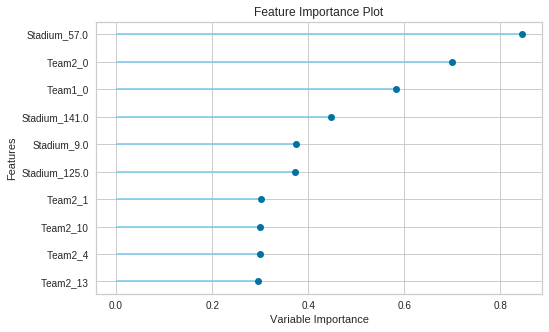

In [56]:
plot_model(tune_ridge, plot='feature')

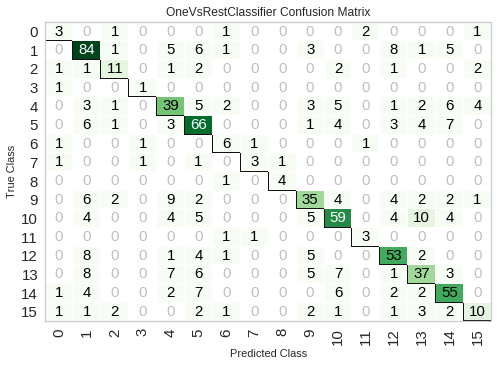

In [59]:

plot_model(tune_et, plot = 'confusion_matrix')

In [60]:

blend_hard = blend_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6534,0.0,0.6078,0.6464,0.6454,0.6132
1,0.6534,0.0,0.6830,0.6624,0.6438,0.6109
2,0.6648,0.0,0.6249,0.6637,0.6582,0.6248
3,0.6250,0.0,0.5186,0.6178,0.6154,0.5806
4,0.6023,0.0,0.5853,0.6054,0.5921,0.5554
5,0.6457,0.0,0.7235,0.6541,0.6285,0.6015
6,0.6571,0.0,0.6782,0.6703,0.6539,0.6161
7,0.6229,0.0,0.5348,0.6352,0.6174,0.5771
8,0.6514,0.0,0.5499,0.6573,0.6455,0.6094
9,0.6400,0.0,0.5370,0.6635,0.6406,0.5980


In [75]:
blend_hard

VotingClassifier(estimators=[('Logistic Regression_0',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Extreme Gradient Boosting_12',
                              XGBClassifier(base_score=0.5, bo...
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
  

In [61]:
blend_soft = blend_models(method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6193,0.0,0.5911,0.6128,0.6120,0.5753
1,0.6250,0.0,0.6389,0.6292,0.6162,0.5796
2,0.6250,0.0,0.5459,0.6233,0.6199,0.5809
3,0.6364,0.0,0.5333,0.6300,0.6273,0.5934
4,0.6136,0.0,0.5727,0.6164,0.6063,0.5683
5,0.6229,0.0,0.7025,0.6308,0.6065,0.5759
6,0.6571,0.0,0.6524,0.6686,0.6547,0.6162
7,0.6000,0.0,0.5634,0.6246,0.5948,0.5515
8,0.6571,0.0,0.5403,0.6586,0.6506,0.6162
9,0.6457,0.0,0.5241,0.6635,0.6457,0.6048


In [74]:
blend_soft

VotingClassifier(estimators=[('Ada Boost Classifier_6',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123)),
                             ('Gradient Boosting Classifier_7',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                  

In [62]:
blend_specific_hard = blend_models(estimator_list = [tune_et,tune_ridge], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6477,0.0,0.5113,0.6363,0.6359,0.6063
1,0.6136,0.0,0.5989,0.6339,0.5960,0.5653
2,0.6818,0.0,0.5984,0.6911,0.6669,0.6434
3,0.6591,0.0,0.5901,0.6542,0.6502,0.6193
4,0.6136,0.0,0.5697,0.6281,0.5961,0.5675
5,0.5886,0.0,0.6116,0.5557,0.5548,0.5369
6,0.6400,0.0,0.6522,0.6553,0.6320,0.5969
7,0.6000,0.0,0.5423,0.6030,0.5877,0.5514
8,0.6286,0.0,0.6128,0.6375,0.6116,0.5838
9,0.6171,0.0,0.5319,0.6492,0.6126,0.5719


In [63]:
blend_specific_soft = blend_models(estimator_list = [tune_et,tune_ridge], method = 'soft')

SystemExit: (Type Error): Estimator list contains estimator that doesnt support probabilities and method is forced to soft. Either change the method or drop the estimator.

In [67]:
final = finalize_model(blend_soft)

In [70]:
d=predict_model(data=test,estimator=final)

In [72]:
d.head(20)

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,Label,Score
0,2,4,34,1,Home,Away,First,Second,Oct,2,0.5026
1,14,1,19,15,Home,Away,First,Second,Mar,1,0.3995
2,9,10,130,14,Neutral,Neutral,Second,First,Dec,10,0.4189
3,9,10,8,9,Home,Away,First,Second,Dec,9,0.4865
4,5,15,130,14,Neutral,Neutral,First,Second,Oct,5,0.7224
5,14,10,81,15,Home,Away,Second,First,May,14,0.3771
6,6,2,12,5,Home,Away,Second,First,Jul,2,0.5489
7,1,10,138,0,Home,Away,First,Second,Feb,1,0.5717
8,5,13,139,3,Neutral,Neutral,First,Second,May,5,0.6129
9,1,5,95,0,Home,Away,Second,First,Feb,1,0.6368


In [73]:
final

VotingClassifier(estimators=[('Ada Boost Classifier_6',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123)),
                             ('Gradient Boosting Classifier_7',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                  